# Math 638 Homework 3
Geneva Porter, 13 February 2019

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.integrate as int
import matplotlib.image as mpimg

%matplotlib inline 

## Problem 1 (3.4.11)

Consider the system $\dot{x}=rx-\sin(x)$.

### a) For the case $r=0$, find and classify all the fixed points, and sketch the vector field.

When $r=0$, all the fixed points for $\dot{x}$ occur when $-\sin(x)=0$. This happens at $x^*=n\pi$, $n=0, \pm1, \pm2, ...$ The stability of each fixed point alternates, with stable fixed points occurring at $x^*=2n\pi$ and instable fixed points at $x^*=(2n+1)\pi$. The vector field for $-2\pi\leq x(t)\leq2\pi$ is shown below.

Problem 3.4.11 a)


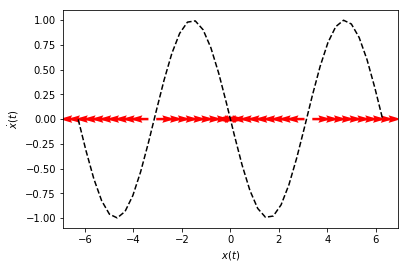

In [24]:
r=0
xvals = np.linspace(-6.28,6.28,40)
yvals = np.zeros(xvals.size)
xprime = r*xvals-np.sin(xvals)
yprime = np.zeros(xvals.size)
norm=np.sqrt(xprime**2+yprime**2)
plt.plot(xvals,r*xvals-np.sin(xvals),ls='--',color='k')
plt.quiver(xvals,yvals,xprime/norm,yprime/norm,color='r')
plt.xlabel('$x(t)$')
plt.ylabel('$\dot{x}(t)$')
print 'Problem 3.4.11 a)'

### b) Show that when $r>1$, there is only one fixed point. What kind of fixed point is it?

The simplest way to show that there is only one fixed point for $r>1$ is to examine its plot. It is clear that the curve only intersects the $x$-axis once when $r=1$, resulting in an unstable fixed point. We can also note that when comparing the graphs of $y=\sin(x)$ and $y=rx$, there will be only one intersection at the origin for $r\geq1$. 

Problem 3.4.11


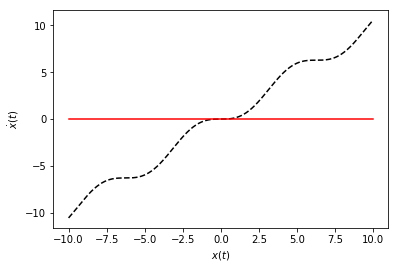

In [22]:
r=1
xvals = np.linspace(-10,10,1000)
yvals = np.zeros(xvals.size)
xprime = r*xvals-np.sin(xvals)
yprime = np.zeros(xvals.size)
norm=np.sqrt(xprime**2+yprime**2)
plt.plot(xvals,r*xvals-np.sin(xvals),ls='--',color='k')
plt.plot([-10,10],[0,0],color='r')
plt.xlabel('$x(t)$')
plt.ylabel('$\dot{x}(t)$')
print 'Problem 3.4.11 b)'

### c) As r decreases from $\infty$ to 0, classify _all_ the bifurcations that occur.

As $r$ decreases  from $\infty$ to $1<x$, there is only ever one unstable fixed point at the origin. For $0<r<1$, the number of fixed points increases severely, and when $r=0$ there is an infinite number of fixed points. Each bifurcation is a subcritical pitchfork bifurcation.

### d) For $0<r<<1$, find and approximate formula for values of $r$ at which bifurcations occur.

For very small positive values of $r$, $\dot{x}\approx-\sin(x)$. Bifurcations occur very close to the zeros for $\sin(x)$, at $x^*=n\pi$ for $n=0,\pm1,\pm2,...$


### e) Now classify all the bifurcations that occur as $r$ decreases from 0 to $-\infty$.

At $r=0$, there are bifurcations at each $x^*=n\pi$, as we stated before. From $-0.25<x<0$, all but the zero fixed points disappear via subcritical pitchfork bifurcation, just as before. 

### f) Plot the bifurcation diagram for $-\infty<r<\infty$, and indicate the stability of the various branches of fixed points.

Below is the bifurcation diagram for $\dot{x}=rx-\sin(x)$. The black branches represent stable fixed points and the red ones unstable fixed points.

Problem 3.4.11 f)


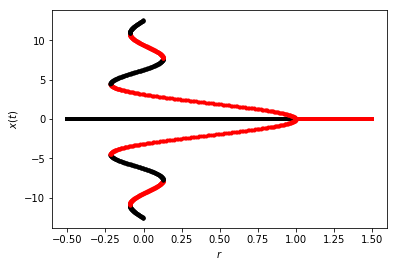

In [19]:
X = np.linspace(-4*3.14,4*3.14,1000)
R = np.sin(X)/X
i=0

plt.plot([-.5,1],[0,0],color='k',linewidth=4.0)
plt.plot([1,1.5],[0,0],color='r',linewidth=4.0)

while i < len(X):
    if R[i]-np.cos(X[i])>0:
        plt.plot(R[i],X[i],marker='.',color='r')
    else:
       plt.plot(R[i],X[i],marker='.',color='k') 
    i += 1

plt.xlabel('$r$')
plt.ylabel('$x(t)$')
print 'Problem 3.4.11 f)'

**Comments**: There is quite a bit more anlaysis that you could do to further expand on your results.  -5

## Problem 2 (3.4.15)

Consider the potential $V(x)$ for the system $\dot{x}=rx+x^3-x^5$. Calculate $r_c$, where $r_c$ is defined by the condition that $V$ has three equally deep wells, i.e., the values of $V$ at the three local minima are equal.

This problem can be solved with some basic calculus and advanced algebra. If we are looking to identify the wells of $V(x)$, we must first find its critical points, given by $\dot{x}=0$. These occur at

$$
x^*=0 ~~~\text{and the four roots}~~~x^*=\pm\left(\frac{1}{2}\pm\sqrt{r+\frac{1}{4}}\right)^{\frac{1}{2}}
$$

Next, we identify the potential $V(x)$ when $\dot{x}=-\frac{dV}{dx}$. This gives us

$$
V(x)=-\frac{1}{2}rx^2-\frac{1}{4}x^4+\frac{1}{6}x^6
$$

Plugging the roots into $V(x)$ yields three unique solutions:

$$
V(x^*)=0 ~~~\text{and}~~~V(x^*)=-\frac{1}{24}[6r+1\pm(4r+1)^\frac{3}{2}]
$$

Testing these equations against each other and checking the stability, we find that 

$$
r_c=-\frac{3}{16}
$$ 

yields an equation with three equal wells touching the $x$-axis at $0$ and $\pm \frac{\sqrt{3}}{2}$.

## Problem 3 (3.5.3)

Show that 

$$
mr\ddot{\phi}=-b\dot{\phi}-mg\sin(\phi)+mr\omega^2\sin(\phi)\cos(\phi)
$$ 

reduces to 

$$
\frac{d\phi}{d\tau}=A\phi-B\phi^3+\mathcal{O}(\phi^5)
$$ 

near $\phi=0$. Find $A$ and $B$.

#### Solution

From the class notes on 2/6/2019: Let $\tau=\frac{t}{T}$ so that $\frac{d}{dt}=\frac{d}{d\tau}\cdot\frac{1}{T}$. Then

$$
\begin{align}
& mr\frac{d}{dt}(\dot{\phi})=-b\frac{d}{dt}(\phi)-mg\sin(\phi)+mr\omega^2\sin(\phi)\cos(\phi) \\
~~~~~\longrightarrow~~~~~ & mr\frac{d^2}{d\tau^2}\cdot\frac{1}{T^2}(\phi)=-b\frac{d}{d\tau}\cdot\frac{1}{T}\phi- mg\sin(\phi)+mr\omega^2\sin(\phi)\cos(\phi) \\
~~~~~\longrightarrow~~~~~ &mr\frac{d^2\phi}{d\tau^2}=-\frac{b}{T}\cdot\frac{d\phi}{d\tau}-mg\sin(\phi)+mr\omega^2\sin(\phi)\cos(\phi)\\ 
~~~~~\longrightarrow~~~~~ & \frac{mr}{Tb}\frac{d^2\phi}{d\tau^2}=-\frac{d\phi}{d\tau}-\frac{mr\omega^2T}{b}\sin(\phi)\cos(\phi) \\
\end{align}
$$

Now let $T=\frac{b}{mg}$ so that

$$
\begin{align}
~~~~~\longrightarrow~~~~~ & \frac{m^2gr}{b^2}\frac{d^2\phi}{d\tau^2}=-\frac{d\phi}{d\tau}-\sin(\phi)+\frac{r\omega^2}{g}\sin(\phi)\cos(\phi)\\
\end{align}
$$

To simplify the parameters, let's say $\varepsilon=\frac{rm^2g}{b^2}$ and $\gamma=\frac{r\omega^2}{g}$ with $0<\varepsilon<<1$. Then our equation is:

$$
\varepsilon\frac{d^2\phi}{d\tau^2}=-\frac{d\phi}{d\tau}-\sin(\phi)+\gamma\sin(\phi)\cos(\phi)
$$

We can let $\frac{d^2\phi}{d\tau^2}\approx 0$ when $\varepsilon$ is very small. This simplifies our equation to

$$
\frac{d\phi}{d\tau}\approx\sin(\phi)(\gamma\cos(\phi)-1)
$$

This has fixed points at $\phi=0,\pi,\pm\cos^{-1}\left(\frac{1}{\gamma}\right)$ for $\gamma>1$. There are bifurcations at $\gamma=\pm1$. We can do a Taylor series expansion about the fixed point $\phi=0$.

$$
\begin{align}
\frac{d\phi}{d\tau}= & \left(\phi-\frac{\phi^3}{3!}\right)\left(\gamma\left(1-\frac{\phi^2}{2!}\right)-1\right) +\mathcal{O}(\phi^5)\\
 = & \gamma\left(\phi-\frac{\phi^3}{2}-\frac{\phi^3}{6}\right)-\left(\phi-\frac{\phi^3}{6}\right)+\mathcal{O}(\phi^5)\\
 = & \phi(\gamma-1)+\phi^3\left(\frac{-4\gamma+1}{6}\right)+\mathcal{O}(\phi^5)
\end{align}
$$

If we say $A=\gamma-1$ and $B=\frac{4\gamma+1}{6}$, then we have 

$$
\frac{d\phi}{d\tau}= A\phi+B\phi^3+\mathcal{O}(\phi^5)
$$



## Problem 4 (3.5.6)

Consider the _linear_ differential equation

$$
\varepsilon\ddot{x}+\dot{x}+x=0
$$

subject to the initial conditions $x(0)=1$, $\dot{x}(0)=0$

### a) Solve the problem analytically for all $\epsilon>0$.

We can use the common ODE solution format $x(t)=ce^{\lambda t}$ (where $c$ is a constant) to make the following calculations:

$$
\begin{align}
&\varepsilon\lambda^2ce^{\lambda t}+\lambda ce^{\lambda t}+ce^{\lambda t}=0 \\
&\longrightarrow~~~~~\varepsilon\lambda^2+\lambda+1=0 \\
& \longrightarrow ~~~~~\lambda_1=\frac{-1+\sqrt{1-4\varepsilon}}{2\varepsilon}~~~~~\text{and}~~~~~\lambda_12=\frac{-1-\sqrt{1-4\varepsilon}}{2\varepsilon} \\
\end{align}
$$

So we have $x(t)=c_1e^{\lambda_1t}+c_2e^{\lambda_2t}$. Using our initial conditions, we find that:

$$
c_2=1-c_1~~~~~\text{and}~~~~~c_1=-\frac{\lambda_2}{\lambda_1-\lambda_2}~~~~~\longrightarrow
$$

$$
x(t)=-\frac{\lambda_2}{\lambda_1-\lambda_2}e^{\lambda_1t}+\left(1+\frac{\lambda_2}{\lambda_1-\lambda_2}\right)e^{\lambda_2t}
$$


### b) Now suppose $\varepsilon <<1$. Show that there are two widely separated time scales in the problem, and estimate them in terms of $\varepsilon$.

If $0<\varepsilon<<1$, then we can estimate $\sqrt{1-4\varepsilon}\approx1$, which give us $\lambda_1\approx0$ and the very large $\lambda_2\approx-\frac{1}{\varepsilon}$. This implies that $|\lambda_1|<<|\lambda_2|$, so the time scales are separated by several orders of magnitude.


### c) Graph the solution $x(t)$ for $\epsilon<<1$, and indicate the two time scales on the graph.


Problem 3.5.6


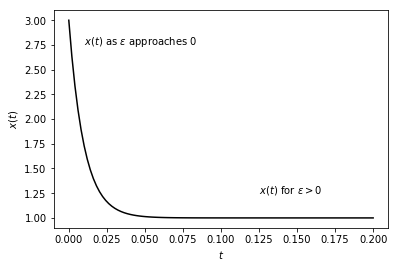

In [100]:
ep = 0.01
xvals = np.linspace(0,0.2,100)

plt.plot(xvals,1+2*np.exp(-1/ep*xvals),color='k')

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.text(0.01,2.75,'$x(t)$ as $\epsilon$ approaches $0$')
plt.text(0.125,1.25,'$x(t)$ for $\epsilon>0$')

print 'Problem 3.5.6'

**Commments**: Why doesn't your solution start at $x(0)=1$ and go to $x(t) \sim 0$ as $t\rightarrow \infty$? What about different time scales?  -2

### d) What do you conclude about the validity of replacing $\varepsilon\ddot{x}+\dot{x}+x=0$ with its singular limit $\dot{x}+x=0$?

The singular limit approximation gives us a quicker qualitative understanding of the system, as well as verifies the existence of two different time scales. Useful!

### e) Give two physical analogs of this problem, one involving a mechanical system, and another involving an electrical circuit. In each case, find the dimensionless combination of parameters corresponding to $\varepsilon$, and state the physical meaning of the limit $\varepsilon<<1.$


#### Mechanical Problem:

A damped spring without forcing has the form:

$$
m\ddot{u}+b\dot{u}+ku=0
$$

With $m$ = mass, $b$ = linear damping constant, $k$ = spring constant, and $u(t)$ = displacement. We can use our usual substitutions of $u=\tilde{u}\cdot u_s$ and $t=\tau\cdot t_s$. Then we have:

$$
m\frac{d^2\tilde{u}}{d\tau^2}\frac{u_s^2}{t_s^2}+b\frac{d\tilde{u}}{d\tau}\frac{u_s}{t_s}+k\tilde{u}\cdot u_s=0
$$

Multiplying by $t_s$ and substituting $u_s=\frac{1}{b}$ and $t_s=\frac{b}{k}$ yields:

$$
\frac{mk}{b^3}\ddot{\tilde{u}}+\dot{\tilde{u}}+\tilde{u}=0
$$

We now have an identical scaling problem to the one above, with $\varepsilon=\frac{mk}{b^3}$. We can see that even small increases in $b>1$ will produce significant changes in scaling, so as the damping constant gets larger, $\varepsilon$ approaches zero.


#### Electrical Circuit

An oscillating electric circuit has the form

$$
\ddot{I}+\frac{R}{L}\dot{I}+\frac{1}{LC}I=V(t)
$$

For $I(t)$ = current in a circuit, with $L$ = inductance, $C$ = capacitance, and $R$ = resistance. The voltage source $V(t)$ powers the circuit, which we will set equal to zero.

We can use our usual substitutions of $I=\tilde{I}\cdot I_s$ and $t=\tau\cdot t_s$. Then we have:

$$
\frac{d^2\tilde{I}}{d\tau^2}\frac{I_s^2}{t_s^2}+\frac{R}{L}\frac{d\tilde{I}}{d\tau}\frac{I_s}{t_s}+\frac{1}{LC}\tilde{I}\cdot I_s=0
$$

Multiplying by $t_s$ and substituting $I_s=\frac{L}{R}$ and $t_s=RC$ yields:

$$
\frac{L^2}{R^3C}\ddot{\tilde{I}}+\dot{\tilde{I}}+\tilde{I}=0
$$

We now have an identical scaling problem to the one above, with $\varepsilon=\frac{L^2}{R^3C}$. We can see that even small increases in $R>1$ will produce significant changes in scaling, so as the resistance gets larger, $\varepsilon$ approaches zero.

**Comments**: $V=IR$, so $L\neq IR$, so I'm not sure what got off track exactly.  -1

## Problem 5 (3.6.7)

A magnet can be modeled as an enormous collection of electronic spins. In the simplest model, known as the _**Ising model**_, the spins can point only up or down, and are assigned the values of $S_i=\pm1$, for $i=1,...,N>>1$. For quantum mechanical reasons, the spins like to point in the same direction as their neighbors. in the other hand, the randomizing effects of temperature tend to disrupt any such alignment.

An important macroscopic property of the magnet is its average spin or _magnetization_

$$
m=\left|\frac{1}{N}\sum^N_{i=1}S_i\right|.
$$

At high temperature the spins point in random directions and so $m\approx0$; the material is in the _paramagnetic_ state. As the temperature is lowered, _m_ remains near zero until a critical temperature $T_c$ is reached. Then a _**phase transition**_ occurs and the material spontaneously magnetizes. Now $m>0$; we have a _ferromagnet_. 

But the symmetry between up and down spins means that there are _two_ possible ferromagnetic states. This symmetry can be broken by applying an external magnetic field $h$, which favors either the up or down direction. Then, in an approximation called _mena-field theory_, the equation governing the equilibrium value of $m$ is 

$$
h=T\tanh^{-1}(m)-Jnm
$$

where $J$ and $n$ are constants; $J>0$ is the ferromagnetic coupling strength and $n$ is the number of neighbors of each spin.

### a) Analyze the solutions $m^*$ of $h=T\tanh^{-1}(m)-Jnm$, using a graphical approach.

Before graphing $h(m)$, we can use use a Taylor expansion about the fixed point $m=0$. We can then see that $h(m)=\frac{1}{3}m^3+m(T-Jn)+\mathcal{O^5}$ for $-1<m<1$. For simplicity, we can reduce this to $h(m)\approx \frac{1}{3}m^3+\alpha m$ with $\alpha=T-Jn$. Now, we can easily analyze this graphically, as seen below.


Problem 3.6.7


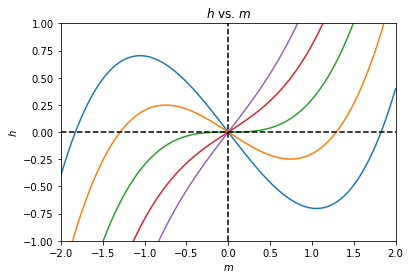

In [94]:
alpha = np.linspace(-1,1,5)
min = -2
max = 2
mvals = np.linspace(min,max,100)

for A in alpha:
    plt.plot(mvals,.3*mvals**3+A*mvals)

plt.plot([min,max],[0,0],ls='--',color='k')
plt.plot([0,0],[-1,1],ls='--',color='k')
plt.xlim((-2,2))
plt.ylim((-1,1))
plt.xlabel('$m$')
plt.ylabel('$h$')
plt.title('$h$ vs. $m$')

print 'Problem 3.6.7'

By varying $\alpha$, we can see that there can be either 1 or 3 fixed points. For $\alpha>0$, there is one unstable fixed point at $m=0$. for $\alpha<0$, there are three fixed points: one stable at $m=0$ surrounded by an unstable on either side at $m=\pm\sqrt{-\alpha}$. The pitchfork bifurcation occurs at $\alpha=0$, as seen below.

Problem 3.6.7


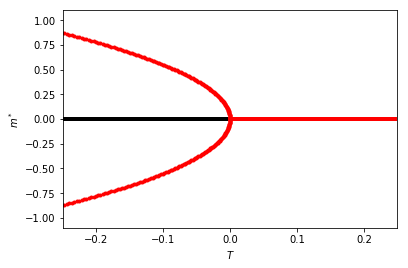

In [98]:
min = -1
max = 1
M = np.linspace(min,max,300)
A = -0.33*M**2

plt.plot([-1,0],[0,0],color='k',linewidth=4.0)
plt.plot([0,1],[0,0],color='r',linewidth=4.0)

i=0
while i < len(M):
    if M[i]**2+A[i]>0:
        plt.plot(A[i],M[i],marker='.',color='r')
    else:
       plt.plot(A[i],M[i],marker='.',color='k') 
    i += 1

plt.xlabel('$T$')
plt.ylabel('$m^*$')
plt.xlim((-.25,.25))
print 'Problem 3.6.7'

**Comments**: You cannot have a pitchfork bifurcation when $h\neq 0$. -2

### b) For the special case $h=0$, find the critical temperature $T_c$ at which a phase transition occurs.

Since the bifurcation occurs at $\alpha=0$, we know that $T_c$ occurs when $T_c-Jn=0$ or $T_c=Jn$ (approximately).


**Total**: 30/40